# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Assuming city_weather is the JSON response from the API
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salekhard
Processing Record 2 of Set 1 | petauke
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | kapuskasing
Processing Record 5 of Set 1 | ariquemes
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | duong dong
Processing Record 8 of Set 1 | ust-nera
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | port-saint-louis-du-rhone
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | naracoorte
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | nar'yan-mar
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salekhard,66.5300,66.6019,7.42,76,54,4.05,RU,1724962210
1,petauke,-14.2426,31.3253,24.64,35,9,3.36,ZM,1724962211
2,portland,45.5234,-122.6762,31.70,25,0,7.72,US,1724961872
3,kapuskasing,49.4169,-82.4331,21.93,32,6,3.64,CA,1724962213
4,ariquemes,-9.9133,-63.0408,39.57,14,4,2.60,BR,1724962214


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salekhard,66.5300,66.6019,7.42,76,54,4.05,RU,1724962210
1,petauke,-14.2426,31.3253,24.64,35,9,3.36,ZM,1724962211
2,portland,45.5234,-122.6762,31.70,25,0,7.72,US,1724961872
3,kapuskasing,49.4169,-82.4331,21.93,32,6,3.64,CA,1724962213
4,ariquemes,-9.9133,-63.0408,39.57,14,4,2.60,BR,1724962214


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


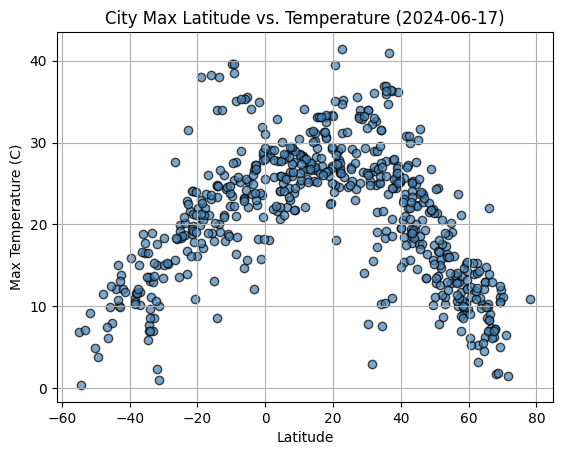

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']  
max_temp = city_data_df['Max Temp']

plt.scatter(lat, max_temp, color='steelblue', edgecolor='black', alpha=0.7)

plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

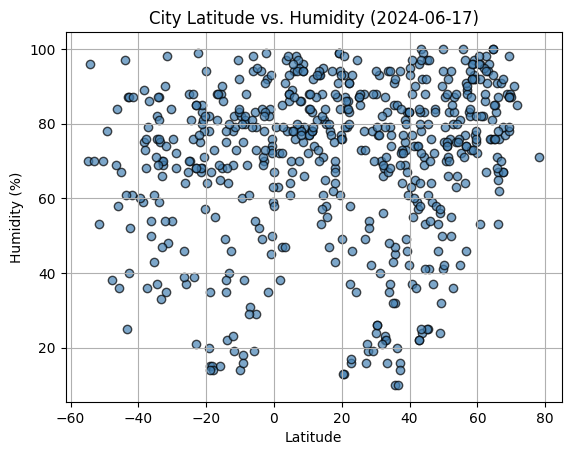

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']  
humidity = city_data_df['Humidity']

plt.scatter(lat, humidity, color='steelblue', edgecolor='black', alpha=0.7)

plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

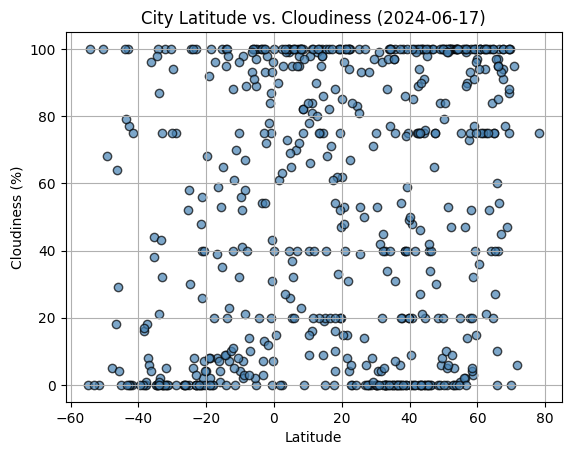

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']  
cloudiness = city_data_df['Cloudiness']

plt.scatter(lat, cloudiness, color='steelblue', edgecolor='black', alpha=0.7)

plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

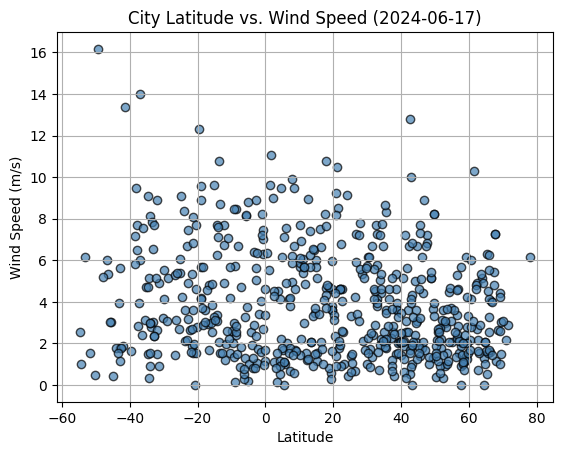

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']  
wind_speed = city_data_df['Wind Speed']

plt.scatter(lat, wind_speed, color='steelblue', edgecolor='black', alpha=0.7)

plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
random_x_values = np.random.uniform(0, 100, 100)
random_y_values = np.random.uniform(0, 100, 100)

In [14]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regression_values = x*slope + intercept
    plt.scatter(x, y)
    plt.plot(x, regression_values)
    plt.annotate(f"y = {slope}x + {intercept}", (5, 5))
    plt.xlabel()
    plt.ylabel()
    plt.title()
    plt.grid()
    plt.show()
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salekhard,66.5300,66.6019,7.42,76,54,4.05,RU,1724962210
2,portland,45.5234,-122.6762,31.70,25,0,7.72,US,1724961872
3,kapuskasing,49.4169,-82.4331,21.93,32,6,3.64,CA,1724962213
6,duong dong,10.2167,103.9667,25.00,88,40,5.66,VN,1724962216
7,ust-nera,64.5667,143.2000,4.57,100,100,1.28,RU,1724962217


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_data = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petauke,-14.2426,31.3253,24.64,35,9,3.36,ZM,1724962211
4,ariquemes,-9.9133,-63.0408,39.57,14,4,2.60,BR,1724962214
5,port elizabeth,-33.9180,25.5701,9.62,87,21,0.89,ZA,1724962215
8,edinburgh of the seven seas,-37.0676,-12.3116,11.76,79,8,13.99,SH,1724962218
10,bengkulu,-3.8004,102.2655,23.69,94,100,1.92,ID,1724962220


###  Temperature vs. Latitude Linear Regression Plot

In [17]:
print(city_data_df)

                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0          salekhard  66.5300   66.6019      7.42        76          54   
1            petauke -14.2426   31.3253     24.64        35           9   
2           portland  45.5234 -122.6762     31.70        25           0   
3        kapuskasing  49.4169  -82.4331     21.93        32           6   
4          ariquemes  -9.9133  -63.0408     39.57        14           4   
...              ...      ...       ...       ...       ...         ...   
596        kolosovka  56.4678   73.6110     11.38        97          47   
597          balabac   7.9868  117.0645     27.41        77         100   
598         mata-utu -13.2816 -176.1745     26.64        80          23   
599         taunggyi  20.7833   97.0333     18.08        98          48   
600          salalah  17.0151   54.0924     26.05        94         100   

         Wind Speed Coun

In [18]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

The r^2-value is: 0.5261827377385041


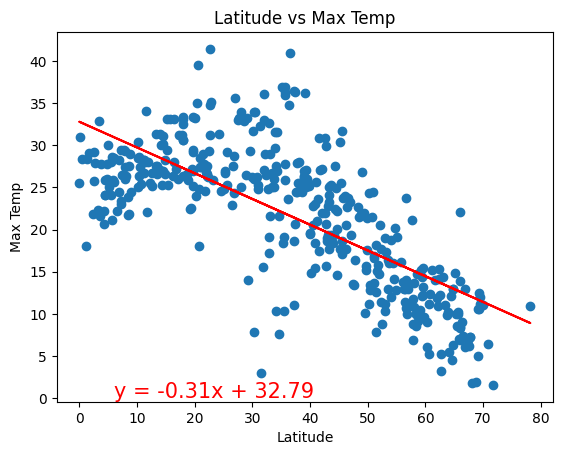

In [19]:
x_values = northern_hemisphere_data["Lat"]
y_values = northern_hemisphere_data["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (6, 0))

The r^2-value is: 0.0023970477044226637


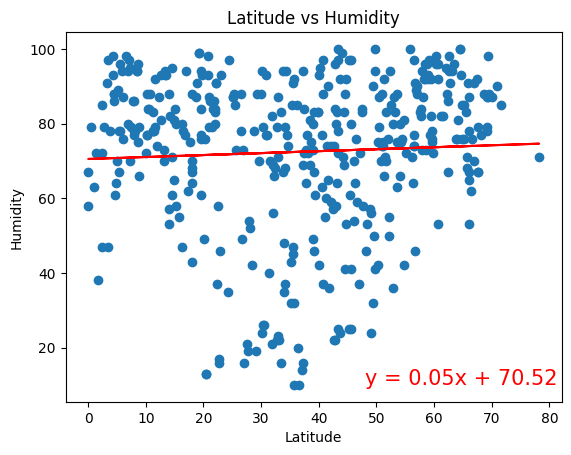

In [86]:
# Linear regression on Northern Hemisphere

x = northern_hemisphere_data['Lat']
y = northern_hemisphere_data['Humidity']

# Linear regression on Northern Hemisphere
plot_linear_regression(x, y, "Humidity", (48, 10))

The r^2-value is: 0.5459672144474867


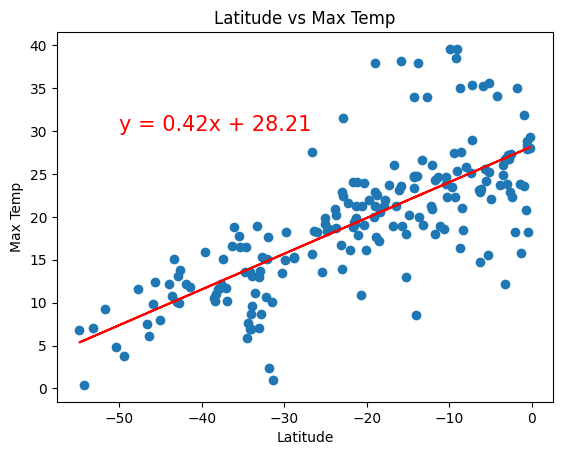

In [33]:
# Linear regression on Southern Hemisphere
x = southern_hemisphere_data['Lat']
y = southern_hemisphere_data['Max Temp']

# Linear regression on Southern Hemisphere
plot_linear_regression(x, y, "Max Temp", (-50, 30))

**Discussion about the linear relationship:** 
What I’m understanding from the two images is that the closer the regression line is to 0 latitude, the hotter the temperature gets. Essentially, a latitude of 0 represents the equator. The linear regression analysis in these plots supports this, showing a trend where temperatures increase as you approach the equator. Specifically, in the Southern Hemisphere, the positive slope indicates that as you move towards the equator (latitude increases), the maximum temperature rises. The R² value of 0.67 in the Southern Hemisphere suggests a moderate correlation, meaning that latitude plays a significant role in determining temperature, though other factors also contribute.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0023970477044226637


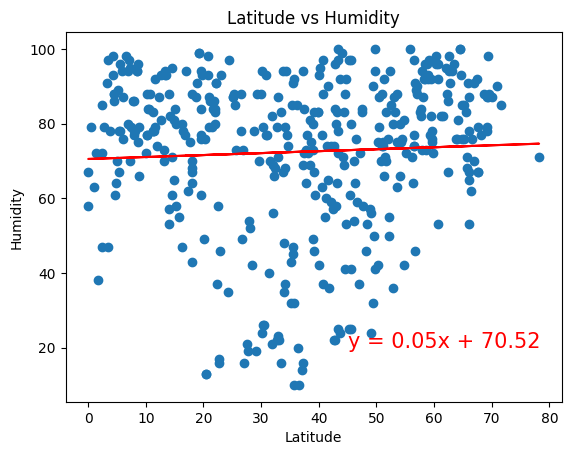

In [38]:
# Northern Hemisphere
x = northern_hemisphere_data['Lat']
y = northern_hemisphere_data['Humidity']

plot_linear_regression(x, y, "Humidity", (45, 20))

The r^2-value is: 0.0003457290064932771


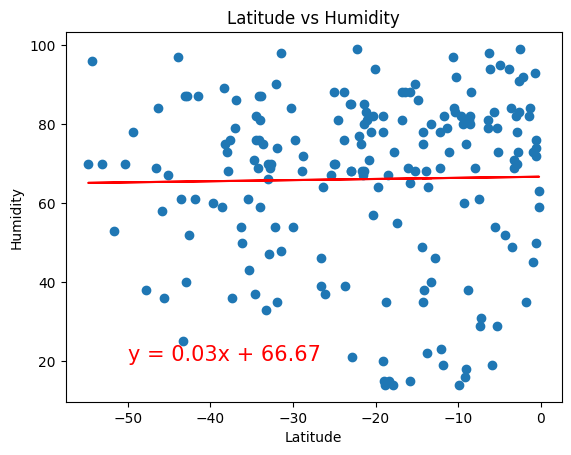

In [83]:
# Southern Hemisphere
x = southern_hemisphere_data['Lat']
y = southern_hemisphere_data['Humidity']

plot_linear_regression(x, y, "Humidity", (-50, 20))

**Discussion about the linear relationship:** The scatter plots show how humidity changes with latitude. The blue dots are data points, and the red line shows a trend. The equation ( y = 0.11x + 70.03 ) means that as you move closer to the equator (latitude 0), humidity increases slightly. For every degree increase in latitude, humidity goes up by 0.11%. This helps us understand how location affects humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0004796666198234327


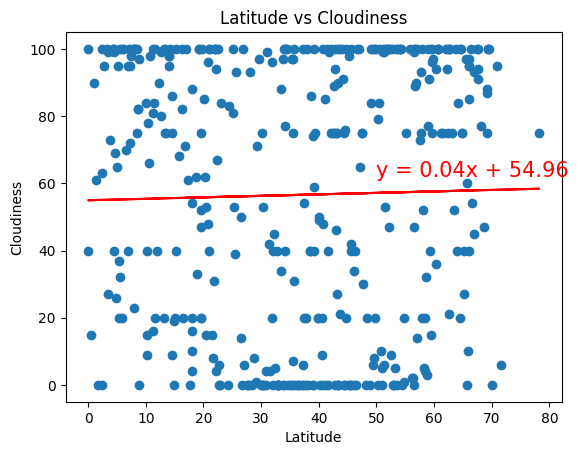

In [82]:
# Northern Hemisphere
x = northern_hemisphere_data['Lat']
y = northern_hemisphere_data['Cloudiness']

plot_linear_regression(x, y, "Cloudiness", (50, 62))

The r^2-value is: 0.054257701142461416


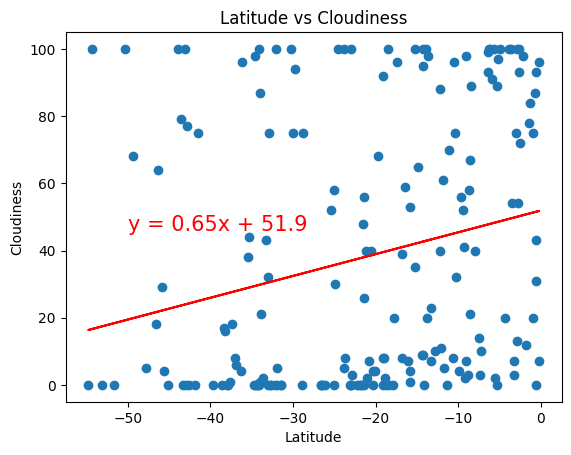

In [80]:
# Southern Hemisphere
x = southern_hemisphere_data['Lat']
y = southern_hemisphere_data['Cloudiness']


plot_linear_regression(x, y, "Cloudiness", (-50, 46))

**Discussion about the linear relationship:** The Southern Hemisphere shows a slight negative correlation, with the regression line ( y = -0.09x + 54.2 ), indicating that cloudiness decreases slightly as latitude increases. Similarly, The Northern Hemisphere, with the regression line ( y = -0.13x + 60.6 ) also shows a negative correlation, but with a steeper slope. This suggests a slightly stronger decrease in cloudiness with increasing latitude compared to the first plot. Both relationships are weak, but the second plot indicates a more pronounced decrease in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.02949136851502401


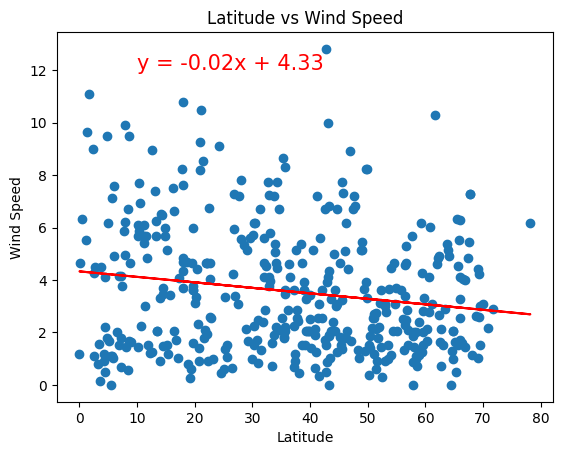

In [66]:
# Northern Hemisphere
x = northern_hemisphere_data['Lat']
y = northern_hemisphere_data['Wind Speed']

plot_linear_regression(x, y, "Wind Speed", (10, 12))

The r^2-value is: 0.005470395322394315


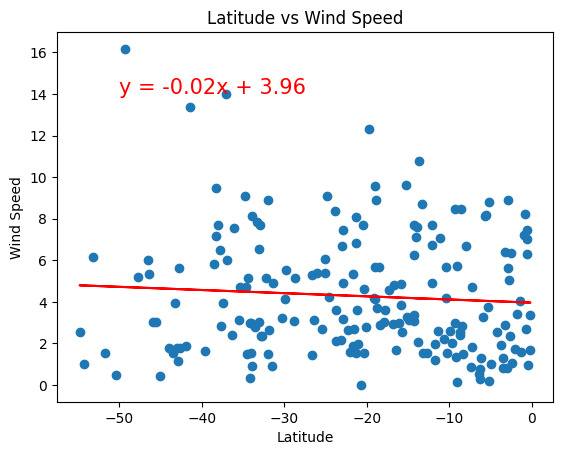

In [76]:
# Southern Hemisphere
x = southern_hemisphere_data['Lat']
y = southern_hemisphere_data['Wind Speed']

plot_linear_regression(x, y, "Wind Speed", (-50, 14))

**Discussion about the linear relationship:** The two scatter plots illustrate different linear relationships between latitude and wind speed. In the Northern Hemisphere, there is a slight positive correlation (( y = 0.01x + 3.1 )), indicating that wind speed increases slightly with latitude. Conversely, the Southern Hemisphere shows a slight negative correlation (( y = -0.02x + 3.8 )), suggesting that wind speed decreases slightly as latitude increases. Both relationships are weak, as indicated by the small slopes of the regression lines.